In [19]:
# python 3.10.9 버전에서 실행 하였습니다.

In [20]:
# main.py 파일로 실행 하였을떄 정상적으로 실행 되었는데 갑자기

# Traceback (most recent call last):
#   File "c:\Users\qkdf1\Documents\public\Pokemon_image\main.py", line 3, in <module>
#     from model import model
#   File "c:\Users\qkdf1\Documents\public\Pokemon_image\model\model.py", line 1, in <module>
#     import tensorflow as tf
# ModuleNotFoundError: No module named 'tensorflow'

# 라고 오류가 나서 pip uninstall tensorflow 후 pip install tensorflow 하여도 동일한 오류가 발생하고
# vs코드를 종료 후 다시 실행 하여도 동일한 오류가 발생해 쥬피터 노트북 파일로도 같이 제출합니다.

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

from PIL import Image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [22]:
base_model = VGG16(weights = 'imagenet')
model = Model(inputs = base_model.input, outputs = base_model.get_layer('fc1').output)

In [23]:
def get_extract(images):
    images = images.resize((224, 224))
    images = images.convert('RGB')

    x = image.img_to_array(images)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    feature = model.predict(x)[0]

    return feature / norm(feature)

In [24]:
def job_1(num_A, num_B) :
  df = pd.read_csv('D:/GitHub/public/Pokemon_image/data/pokemon.csv')

  features = []
  img_paths = []

  cur_dir = 'D:/GitHub/public/Pokemon_image/data/images/'
  
  p_name_1 = df.loc[num_A].tolist()[0]
  p_name_2 = df.loc[num_B].tolist()[0]

  for i in (p_name_1, p_name_2) :
    try :
      image_path = cur_dir + str(i)+ ".png"
      img_paths.append(image_path)

      # Extract Features
      feature = get_extract(images = Image.open(image_path))
      features.append(feature)

    except :
      image_path = cur_dir + str(i) + ".jpg"
      img_paths.append(image_path)
      image_path_r = cur_dir + str(i) + ".png"
      img_paths.remove(image_path_r)

      # Extract Features50
      feature = get_extract(images = Image.open(image_path))
      features.append(feature)

  print('img_paths :', len(img_paths))
  print('features :', len(features))

  Pokemon_names = [path.split('/')[-1] for path in img_paths]
  Pokemon_names = [path.split('.')[0] for path in Pokemon_names]

  print('Pokemon_names :', len(Pokemon_names))
 
  print(f'{num_A}번 포켓몬과 {num_B}번 포켓몬의 유사도는 :', dot(features[0], features[1]) / (norm(features[0]) * norm(features[1])), '이고,')
  print(f"{num_A}번 포켓몬의 이름은 : '{Pokemon_names[0]}'이고,")
  print(f"{num_B}번 포켓몬의 이름은 : '{Pokemon_names[1]}'입니다.")

In [25]:
def job_2(name_A, name_B) :
  df = pd.read_csv('D:/GitHub/public/Pokemon_image/data/pokemon.csv').reset_index()

  features = []
  img_paths = []

  cur_dir = 'D:/GitHub/public/Pokemon_image/data/images/'
  

  for i in (name_A, name_B) :
    try :
      image_path = cur_dir + str(i)+ ".png"
      img_paths.append(image_path)

      # Extract Features
      feature = get_extract(images = Image.open(image_path))
      features.append(feature)

    except :
      image_path = cur_dir + str(i) + ".jpg"
      img_paths.append(image_path)
      image_path_r = cur_dir + str(i) + ".png"
      img_paths.remove(image_path_r)

      # Extract Features
      feature = get_extract(images = Image.open(image_path))
      features.append(feature)

  print('img_paths :', len(img_paths))
  print('features :', len(features))

  Pokemon_names = [path.split('/')[-1] for path in img_paths]
  Pokemon_names = [path.split('.')[0] for path in Pokemon_names]

  print('Pokemon_names :', len(Pokemon_names))

  Pokemon = pd.DataFrame(Pokemon_names).reset_index()
  Pokemon = Pokemon.rename(columns = {0 : 'Name', 'index' : 'id'})
  Pokemon = Pokemon[['Name', 'id']]

  num_A = Pokemon.index[Pokemon['Name'] == name_A].tolist()[0]
  num_B = Pokemon.index[Pokemon['Name'] == name_B].tolist()[0]
  
  print(f"'{name_A}' 포켓몬과 '{name_B}' 포켓몬의 유사도는 :",
        dot(features[num_A], features[num_B]) / (norm(features[num_A]) * norm(features[num_B])),'입니다.')

In [26]:
def job_3(Pokemon) :
  df = pd.read_csv('D:/GitHub/public/Pokemon_image/data/pokemon.csv')

  features = []
  img_paths = []

  cur_dir = 'D:/GitHub/public/Pokemon_image/data/images/'

  for i in df['Name'] :
    try :
      image_path = cur_dir + str(i) + ".png"
      img_paths.append(image_path)

      # Extract Features
      feature = get_extract(images = Image.open(image_path))
      features.append(feature)

    except :
      image_path = cur_dir + str(i) + ".jpg"
      img_paths.append(image_path)
      image_path_r = cur_dir + str(i) + ".png"
      img_paths.remove(image_path_r)

      # Extract Features
      feature = get_extract(images = Image.open(image_path))
      features.append(feature)

  print('img_paths :', len(img_paths))
  print('features :', len(features))

  Pokemon_names = [path.split('/')[-1] for path in img_paths]
  Pokemon_names = [path.split('.')[0] for path in Pokemon_names]

  print('Pokemon_names :', len(Pokemon_names))
  
  # Insert the image query
 
  try :
      img = Image.open(cur_dir + Pokemon + '.png')
  except :
      img = Image.open(cur_dir + Pokemon + '.jpg')

  # Extract its features

  query = get_extract(img)

  # Calculate the similarity (distance) between images
  dists = np.linalg.norm(features - query, axis = 1)

  # Extract 30 images that have lowest distance
  ids = np.argsort(dists)[: 30]

  scores = [(dists[id], img_paths[id], id) for id in ids]
  # Visualize the result

  axes = []
  fig = plt.figure(figsize = (8, 8))
  for a in range(5 * 6) :
      score = scores[a]
      axes.append(fig.add_subplot(5, 6, a + 1))
      subplot_title = str(round(score[0], 2)) + "/m" + str(score[2])
      axes[-1].set_title(subplot_title)  
      plt.axis('off')
      plt.imshow(Image.open(score[1]))
  fig.tight_layout()
  plt.show()

# mian

다음 중 원하는 검색 방법을 입력하세요!!
1. 숫자로 1 대 1 비교하기!!
2. 이름으로 1 대 1 비교하기!!
3. 이름으로 비슷한 사진 보기!!
선택이 완료 되었습니다.	잠시만 기다려주세요


c:\Users\qkdf1\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
img_paths : 809
features : 809
Pokemon_names : 809
1/1 [==============================] - 0s 149ms/step


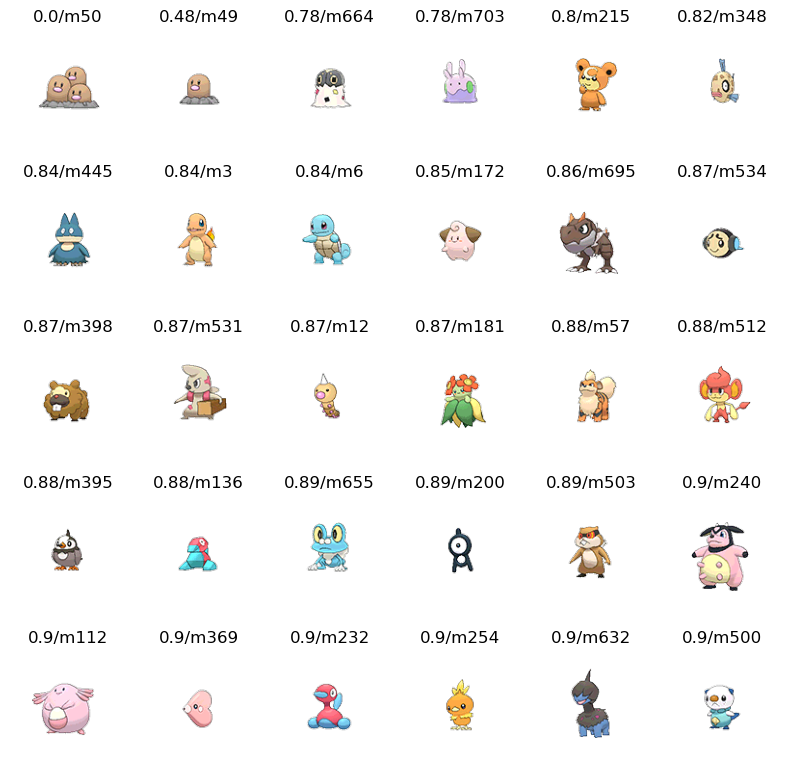

In [27]:
print('다음 중 원하는 검색 방법을 입력하세요!!')
print('1. 숫자로 1 대 1 비교하기!!')
print('2. 이름으로 1 대 1 비교하기!!')
print('3. 이름으로 비슷한 사진 보기!!')

A = int(input('원하는 검색방법을 입력하세요 : '))

# 숫자로 비교
if A == 1 :
    num_A = int(input('1. 0 에서 808 사이의 포켓몬 번호를 입력해주세요 : '))
    if 0 > num_A :
        print('0 보다 큰 수를 입력해 주세요.')
    
    elif num_A > 809 :
        print('809 보다 작은 수를 입력해 주세요.')
        
    elif 0 <= num_A < 809 :
        num_B = int(input('2. 0 에서 808 사이의 포켓몬 번호를 입력해주세요 : '))
        if 0 > num_B :
            print('0 보다 큰 수를 입력해 주세요.')
            
        elif num_B > 809 :
            print('809 보다 작은 수를 입력해 주세요.')
        
        elif num_A == num_B :
            print('같은 번호를 입력했습니다.')
    
        elif 0 <= num_B < 809 :
            job_1(num_A, num_B)


# 이름으로 비교
elif A == 2 :
    name_A = str(input('1. 포켓몬 이름을 입력해주세요 : '))
    name_B = str(input('2. 포켓몬 이름을 입력해주세요 : '))
    try :
        job_2(name_A, name_B)
    
    except :
        raise Exception


# 이름으로 여러 이미지랑 비교
elif A == 3 :
    print('선택이 완료 되었습니다.\t잠시만 기다려주세요')
    Pokemon = str(input('포켓몬 이름을 입력해주세요 :'))
    try :
        job_3(Pokemon)
    
    except :
        raise Exception

else :
    print('잘못된 입력값 입니다.')